In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [119]:
data = pd.read_csv("https://raw.githubusercontent.com/koresh123/-Model_accuracy_assessment_retraining_regularization/refs/heads/main/athletes.csv")

In [120]:
data.shape

(11538, 11)

Датафрейм имеет 11538 строк, в полях с названием "height" и "weight" есть пропуски, поэтому удалим пустые строки

In [121]:
data = data[~data['weight'].isna()]
data = data[~data['height'].isna()]

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [123]:
len(data['name'].unique())

10840

In [124]:
data = data[['height', 'weight', 'gold', 'silver', 'bronze', 'name', 'sport', 'sex']]

In [125]:
data

,height,weight,gold,silver,bronze,name,sport,sex
0,1.72,64.0,0,0,0,A Jesus Garcia,athletics,male
1,1.68,56.0,0,0,0,A Lam Shin,fencing,female
2,1.98,79.0,0,0,1,Aaron Brown,athletics,male
3,1.83,80.0,0,0,0,Aaron Cook,taekwondo,male
4,1.81,71.0,0,0,0,Aaron Gate,cycling,male
...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,0,0,Zurian Hechavarria,athletics,female
11534,1.73,63.0,0,0,0,Zuzana Hejnova,athletics,female
11535,1.85,100.0,0,0,0,di Xiao,wrestling,male
11536,1.60,56.0,0,0,0,le Quoc Toan Tran,weightlifting,male


In [126]:
X = pd.get_dummies(data, columns=['name', 'sport'])

In [127]:
Y = X['sex']
del X['sex']
Y

0          male
1        female
2          male
3          male
4          male
          ...  
11533    female
11534    female
11535      male
11536      male
11537      male
Name: sex, Length: 10858, dtype: object

In [128]:
X

,height,weight,gold,silver,bronze,name_A Jesus Garcia,name_A Lam Shin,name_Aaron Brown,name_Aaron Cook,name_Aaron Gate,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,0,0,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,1.81,71.0,0,0,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11534,1.73,63.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11535,1.85,100.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11536,1.60,56.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [129]:
sex_count = Y.value_counts()

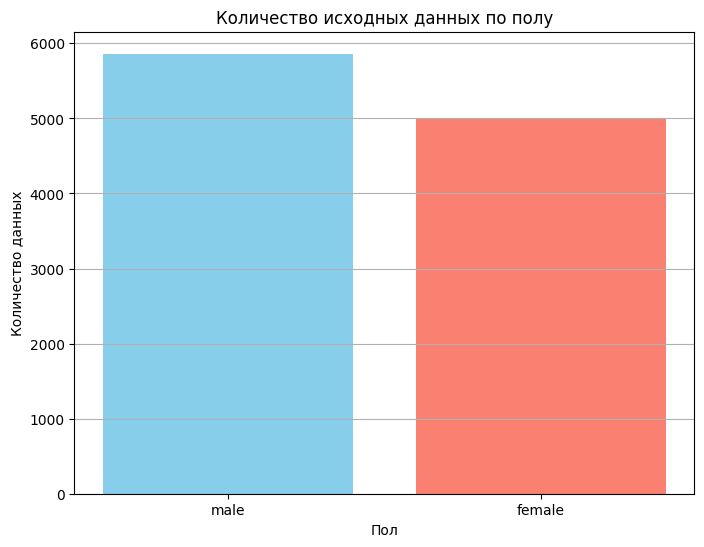

In [130]:
plt.figure(figsize=(8,6))
plt.bar(sex_count.index, sex_count.values, color=['skyblue', 'salmon'])
plt.title('Количество исходных данных по полу')
plt.xlabel('Пол')
plt.ylabel('Количество данных')
plt.xticks(rotation=0)
plt.grid(axis='y')

In [131]:
Y = Y.replace({'male': 1, 'female':0})

C:\Users\Корнилов\AppData\Local\Temp\ipykernel_15028\3856426028.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'male': 1, 'female':0})


Наблюдается дисбаланс в выборках, но на первый взгляд он не большой

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [133]:
len(Y_test)

2172

In [134]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [135]:
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [136]:
y_pred = model.predict(X_test)

In [137]:
y_true = Y_test

In [138]:
accuracy = metrics.accuracy_score(y_true, y_pred)

In [139]:
accuracy

0.8024861878453039

In [140]:
y_scores = model.predict_proba(X_test)[:, 1]

In [141]:
y_scores

array([0.71248491, 0.98906064, 0.12270903, ..., 0.99634115, 0.07939646,
       0.75690016])

In [142]:
fpr, tpr, _ = roc_curve(Y_test, y_scores)

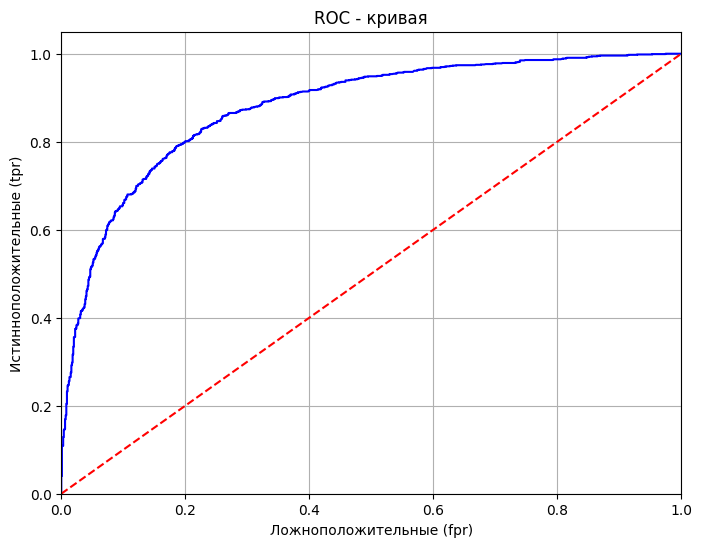

In [143]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC кривая')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные (fpr)')
plt.ylabel('Истинноположительные (tpr)')
plt.title('ROC - кривая')
plt.grid()
plt.show()

In [144]:
roc_auc = auc(fpr, tpr)

In [145]:
roc_auc

np.float64(0.878582573704525)

In [146]:
roc_auc_score = roc_auc_score(Y_test, y_scores)

In [147]:
roc_auc_score

np.float64(0.878582573704525)

Реализация метрие TPR, FPR вручную

TP | FP
FN | TN

TPR =  TP/TP+NF
FPR = FP/FP+TN

In [148]:
def calculate_metrics(y_true, y_scores):
    thresholds = np.linspace(0, 1, num=728)
    tpr_list = []
    fpr_list = []
    precision_list = []
    recall_list = []
    
    for threshold in thresholds:
        TP = FP = TN = FN = 0
        
        for true, score in zip(y_true, y_scores):
            if score >= threshold:
                if true == 1:
                    TP += 1
                else:
                    FP += 1
            else:
                if true == 1:
                    FN += 1
                else:
                    TN += 1

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        PRECISION = TP / (TP + FP) if (TP + FP) > 0 else 0
        RECALL = FP / (FP + TN) if (FP + TN) > 0 else 0
        
        tpr_list.append(TPR)
        fpr_list.append(FPR)
        precision_list.append(PRECISION)
        recall_list.append(RECALL)
    
    return fpr_list, tpr_list, precision_list, recall_list

In [149]:
TPR, FPR, PRECISION, RECALL = calculate_metrics(Y_test, y_scores)

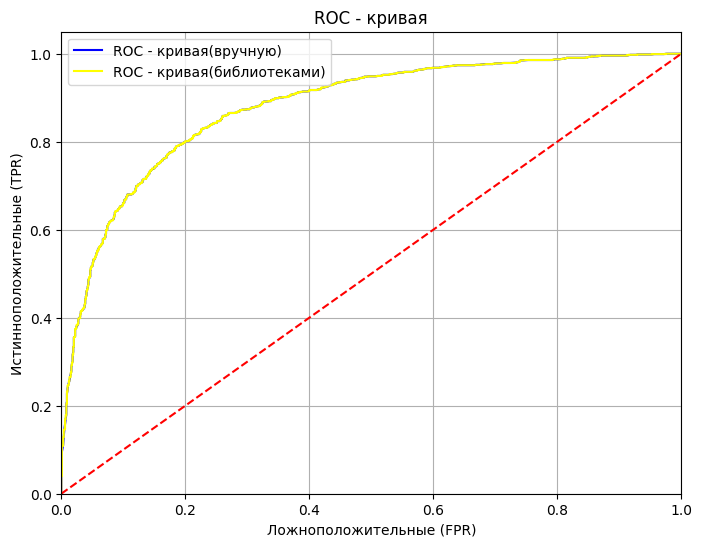

In [150]:
plt.figure(figsize=(8,6))
plt.plot(TPR, FPR, color='blue', label='ROC - кривая(вручную)')
plt.plot(fpr, tpr, color='yellow', label='ROC - кривая(библиотеками)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные (FPR)')
plt.ylabel('Истинноположительные (TPR)')
plt.title('ROC - кривая')
plt.grid()
plt.legend()
plt.show()

Графики идентичны

Строим график Precision-Recall

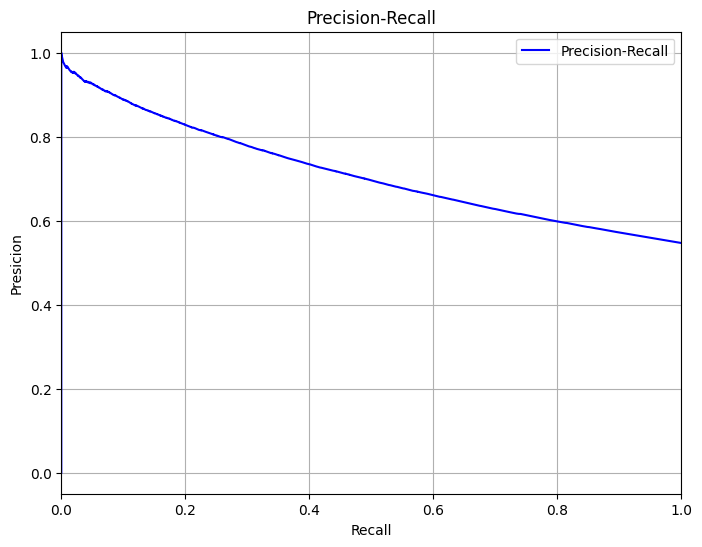

In [151]:
plt.figure(figsize=(8,6))
plt.plot(RECALL, PRECISION, color='blue', label='Precision-Recall')
plt.xlim([0.0, 1.0])
plt.ylabel([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.title('Precision-Recall')
plt.grid()
plt.legend()
plt.show()

Вычислите значение ROC-AUC метрики, используя метрики TPR, FPR

In [156]:
auc = np.trapz(FPR, TPR)

C:\Users\Корнилов\AppData\Local\Temp\ipykernel_15028\2224135781.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(FPR, TPR)


In [157]:
auc

np.float64(-0.8785620431961896)

Выводы:
- Исходя из графиков ROC видно, что площадь под ней составляет более 80%, roc_auc = 0.8785
- Также получили значение ROC-AUC метрики, используя метрики TPR, FPR точно такое же, как и через библиотеки с противоположным знаком
- Если ROC-кривая проходит ниже диагонали, это указывает на то, что модель работает хуже, чем случайное угадывание.  